<a href="https://colab.research.google.com/github/minhhuong05/Econometrics_Midterm_Assignment/blob/main/OLS_Inference_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model

## Prepare data

In [ ]:
# Read the dataset, remove duplicate
df0 = pd.read_csv('bank-additional-full.csv', delimiter=';')

df = df0.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### Label Encoding Categorical Features

In [ ]:
# Select the categorical columns
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Binary Encode
le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)
df.head(5)

<ipython-input-6-171fc07ab6cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].apply(le.fit_transform)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Inference Statistics


**Chosen variables**:
- euribor3m
- emp.var.rate
- nr.employed
- cons.price.idx
- campaign

&rarr; **Linear Regression Equation**: P(y) = 0.57497 - 0.00246\*campaign + 0.01828\*emp.var.rate - 5e-05\*cons.price.idx - 0.00169\*euribor3m - 0.01857*nr.employed  

In [ ]:
# Select only chosen variables
selected_var = ['euribor3m', 'emp.var.rate', 'nr.employed', 'cons.price.idx','campaign']

X = df[selected_var]
y = df['y']

combined_data = pd.concat([y, X])

### OLS Properties

In [ ]:
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Perform OLS regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:13:03   Log-Likelihood:                -8047.6
No. Observations:               41176   AIC:                         1.611e+04
Df Residuals:                   41170   BIC:                         1.616e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.2398      0.798     12.

In [ ]:
# Print the OLS regression equation
regression_equation = "y = "

for i, predictor in enumerate(X.columns):
    coefficient = results.params[i]
    regression_equation += f"{coefficient:.4f}*{predictor} + "
regression_equation = regression_equation[:-3]

print(regression_equation)

y = 10.2398*const + 0.0691*euribor3m + -0.0383*emp.var.rate + -0.0025*nr.employed + 0.0250*cons.price.idx + -0.0016*campaign


#### Scatter Plot

Based on the permutation feature importances shown in model-building section, **euribor3m** and **emp.var.rate** are the most important features

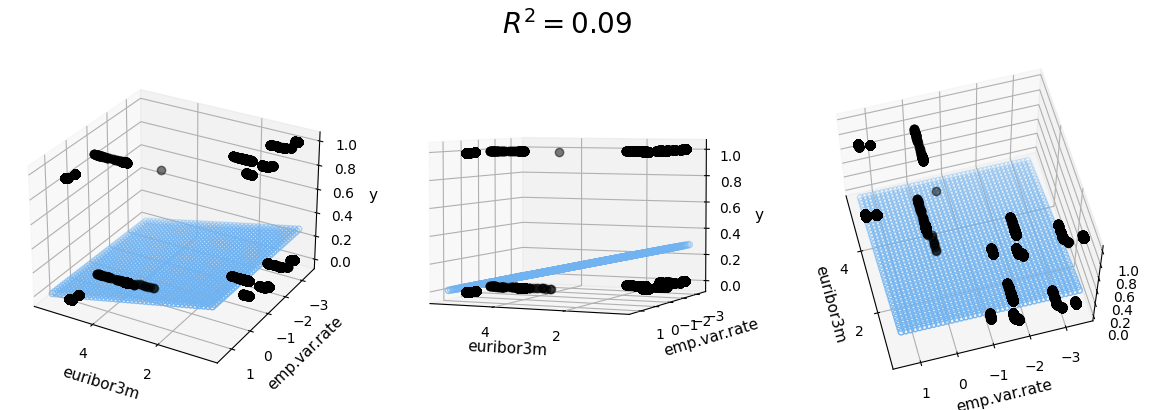

In [ ]:
# Data preparation
X_ = df[['euribor3m', 'emp.var.rate']].values.reshape(-1,2)
Y = df['y']

# Prepare model data point for visualization
x = X_[:, 0]
y_ = X_[:, 1]
z = Y

x_pred = np.linspace(0.6, 5.5, 40)   # range of euribor3m
y_pred = np.linspace(-3.4, 1.4, 40)  # range of emp.var.rate
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Train
ols = linear_model.LinearRegression()
model = ols.fit(X_, Y)
predicted = model.predict(model_viz)

# Evaluate
r2 = model.score(X_, Y) # R square

# Plot
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y_, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('euribor3m', fontsize=11)
    ax.set_ylabel('emp.var.rate', fontsize=11)
    ax.set_zlabel('y', fontsize=11)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

### Inference with T-distribution

In [ ]:
# Perform hypothesis testing on the coefficients
t_values = results.tvalues
p_values = results.pvalues

print("Coefficient\t\tt-value\t\tP-value")
for i, name in enumerate(results.params.index):
    print(f"{name}\t\t{t_values[i]}\t\t{p_values[i]}")

Coefficient		t-value		P-value
const		12.829674181770732		1.3203726178104938e-37
euribor3m		14.754863158971128		3.823617182378928e-49
emp.var.rate		-7.262482740723403		3.867635160355752e-13
nr.employed		-32.21885324735284		6.067361750845048e-225
cons.price.idx		4.613525682373802		3.970864153719991e-06
campaign		-2.945500691330487		0.003226128336901164


### Inference with F-distribution

In [ ]:
# Perform the F-test
f_value = results.fvalue
f_pvalue = results.f_pvalue

# Print the results
print(f"F-value: {f_value}")
print(f"P-value: {f_pvalue}")

F-value: 1276.3083708512304
P-value: 0.0


### Correlation Analysis

In [ ]:
corr = combined_data.corr()
print(corr)

                  0  euribor3m  emp.var.rate  nr.employed  cons.price.idx  \
0               1.0        NaN           NaN          NaN             NaN   
euribor3m       NaN   1.000000      0.972244     0.945146        0.688180   
emp.var.rate    NaN   0.972244      1.000000     0.906949        0.775293   
nr.employed     NaN   0.945146      0.906949     1.000000        0.521945   
cons.price.idx  NaN   0.688180      0.775293     0.521945        1.000000   
campaign        NaN   0.135169      0.150786     0.144129        0.127826   

                campaign  
0                    NaN  
euribor3m       0.135169  
emp.var.rate    0.150786  
nr.employed     0.144129  
cons.price.idx  0.127826  
campaign        1.000000  


### Inference of Coefficient

In [ ]:
# Perform inference on the coefficients
print("Inference of Coefficients:")
print(results.summary().tables[1])

coefficient_names = results.params.index
confidence_intervals = results.conf_int()

# Confidence intervals of the coefficients
print("\nConfidence Intervals of Coefficients:")
for name, interval in zip(coefficient_names, confidence_intervals.values):
    print(f"{name}: [{list(interval)[0]}, {list(interval)[1]}]")

Inference of Coefficients:
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.2398      0.798     12.830      0.000       8.675      11.804
euribor3m          0.0691      0.005     14.755      0.000       0.060       0.078
emp.var.rate      -0.0383      0.005     -7.262      0.000      -0.049      -0.028
nr.employed       -0.0025   7.63e-05    -32.219      0.000      -0.003      -0.002
cons.price.idx     0.0250      0.005      4.614      0.000       0.014       0.036
campaign          -0.0016      0.001     -2.946      0.003      -0.003      -0.001

Confidence Intervals of Coefficients:
const: [8.675420597440732, 11.804133628437308]
euribor3m: [0.05988176334604932, 0.07822814920562308]
emp.var.rate: [-0.04861447099797005, -0.027950796577711393]
nr.employed: [-0.002609552339165462, -0.002310257585166776]
cons.price.idx: [0.014385062029165481, 0.03563623

### Prediction Interval

Get predictions for which future observations are expected to fall, given a certain level of confidence: **95%**

In [ ]:
# Perform prediction interval estimation
prediction_results = results.get_prediction(X)

# Extract the prediction interval
prediction_intervals = prediction_results.conf_int(alpha=0.05)

# Convert prediction_intervals to DataFrame
prediction_intervals_df = pd.DataFrame(prediction_intervals, columns=['lower', 'upper'])

# Print prediction intervals
print("Prediction Intervals:")
for index, interval in prediction_intervals_df.iterrows():
    print(f"Observation {index}: [{interval['lower']}, {interval['upper']}]")

Streaming output truncated to the last 5000 lines.
Observation 36176: [0.16725913507123527, 0.1792737900222837]
Observation 36177: [0.16566691233857334, 0.1777342093827069]
Observation 36178: [0.16725913507123527, 0.1792737900222837]
Observation 36179: [0.16725913507123527, 0.1792737900222837]
Observation 36180: [0.16725913507123527, 0.1792737900222837]
Observation 36181: [0.1638982051655478, 0.17637111318349372]
Observation 36182: [0.16725913507123527, 0.1792737900222837]
Observation 36183: [0.1577306080863048, 0.17314330014601964]
Observation 36184: [0.15314500475026138, 0.1714652967375856]
Observation 36185: [0.16725913507123527, 0.1792737900222837]
Observation 36186: [0.15990463166324048, 0.17410107994132268]
Observation 36187: [0.16566691233857334, 0.1777342093827069]
Observation 36188: [0.16725913507123527, 0.1792737900222837]
Observation 36189: [0.15547091758801332, 0.17227118727207238]
Observation 36190: [0.16725913507123527, 0.1792737900222837]
Observation 36191: [0.1672591350